# Cryptocurrency Market Analysis
***

In this project, we will analyze data from Yahoo Finance of three popular cryptocurrencies to date.

We will use Pandas to extract and analyze the information, visualize it, and analyze risks based on it's performance history.

Here are questions we will try to answer:
-  What was the change of price over time?
-  What was the daily return on average of a stock?
-  What was the moving average of various stock?
-  What is the correlation between daily returns of different stock?
-  How much value do we put at risk by investing in a stock?
-  How can we attempt to predict future stock behavior?

In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf
#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [18]:
#We are going to analyze the top cryptocurrencies.
cryptos = ['BTC-USD', 'ETH-USD', 'LTC-USD']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
BTC = yf.download('BTC-USD', start=start, end=end)
ETH = yf.download('ETH-USD', start=start, end=end)
LTC = yf.download('LTC-USD', start=start, end=end)

print(BTC.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-01-29  43288.246094  43305.867188  41818.332031  42030.914062   
2024-01-30  42952.609375  43838.945312  42711.371094  43300.226562   
2024-01-31  42582.605469  43717.406250  42298.945312  42946.250000   
2024-02-01  43075.773438  43243.167969  41879.191406  42569.761719   
2024-02-02  43185.859375  43422.488281  42584.335938  43077.640625   

Price            Volume  
Ticker          BTC-USD  
Date                     
2024-01-29  20668476578  
2024-01-30  23842814518  
2024-01-31  24673628793  
2024-02-01  21423953779  
2024-02-02  18603843039  


In [5]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,70387.094080,71684.391423,68838.549717,70224.797993,3.957271e+10
std,15676.610559,15990.908487,15336.455939,15661.036529,2.308686e+10
min,42582.605469,43097.644531,41818.332031,42030.914062,9.858199e+09
25%,60824.142578,62276.062500,59791.919922,60813.341797,2.470630e+10
50%,66011.093750,67233.960938,64586.593750,65975.695312,3.370039e+10
75%,71422.394531,72688.835938,69581.156250,71360.679688,4.659618e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,1.492189e+11


In [6]:
BTC.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-01-29,43288.246094,43305.867188,41818.332031,42030.914062,20668476578
2024-01-30,42952.609375,43838.945312,42711.371094,43300.226562,23842814518
2024-01-31,42582.605469,43717.406250,42298.945312,42946.250000,24673628793
2024-02-01,43075.773438,43243.167969,41879.191406,42569.761719,21423953779
2024-02-02,43185.859375,43422.488281,42584.335938,43077.640625,18603843039


In [7]:
#INFORMATION ABOUT BTC DATAFRAME
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2024-01-29 to 2025-01-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   367 non-null    float64
 1   (High, BTC-USD)    367 non-null    float64
 2   (Low, BTC-USD)     367 non-null    float64
 3   (Open, BTC-USD)    367 non-null    float64
 4   (Volume, BTC-USD)  367 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.2 KB


***

## What is the change in stock's price over time?

<Axes: xlabel='Date'>

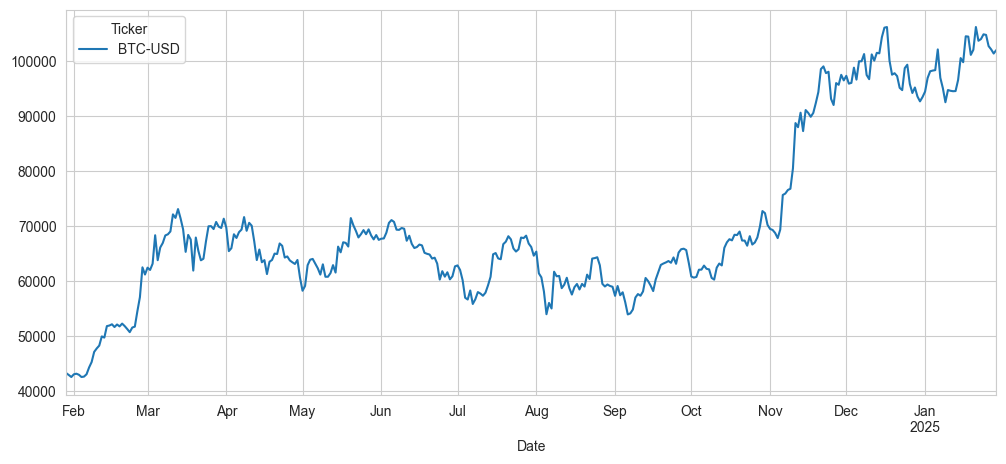

In [10]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Close'].plot(legend = True, figsize=(12,5))

Within the year, we can see the value of BTC almost reach up to 20K.

<Axes: xlabel='Date'>

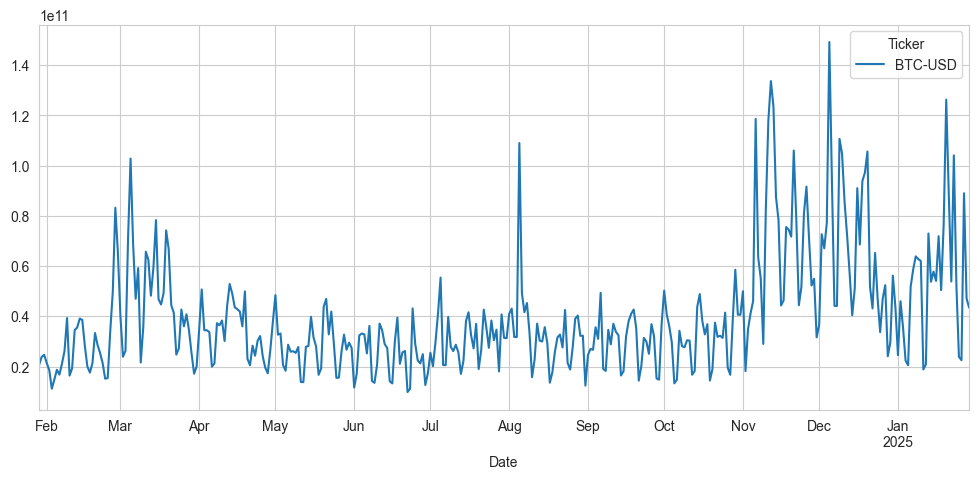

In [11]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

***

## What was the moving average of the stocks?

In [12]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Close'].rolling(window=ma,center=False).mean()

In [13]:
BTC.tail()

Price,Close,High,Low,Open,Volume,MA 10 days,MA 20 days,MA 50 days
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2025-01-25,104714.648438,105243.789062,104120.375000,104824.031250,23888996502,103502.692969,99843.341406,98872.468281
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879,103795.252344,99873.562109,98927.651563
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428,103557.817187,100131.811328,98944.685000
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494,103250.257812,100446.258984,99022.680156
2025-01-29,101947.179688,102902.671875,101287.835938,101287.835938,43447181312,103336.014844,100919.416016,99128.115156


<Axes: xlabel='Date'>

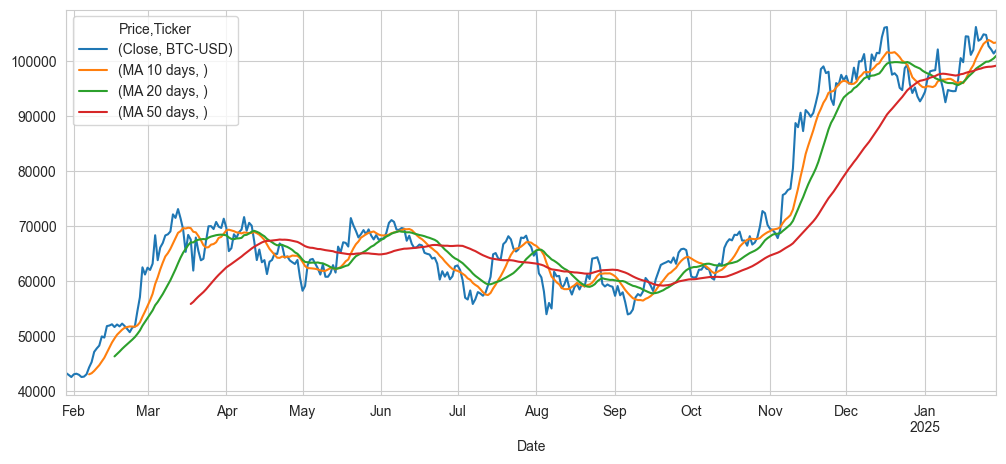

In [14]:
BTC[['Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))

Genereally some casual dips in the past month but overall an upward trend.

***

## What was the daily return average of a stock?

In [15]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Close'].pct_change()

BTC['Daily Return'].tail()

Date
2025-01-25   -0.001000
2025-01-26   -0.019407
2025-01-27   -0.005793
2025-01-28   -0.007398
2025-01-29    0.006066
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

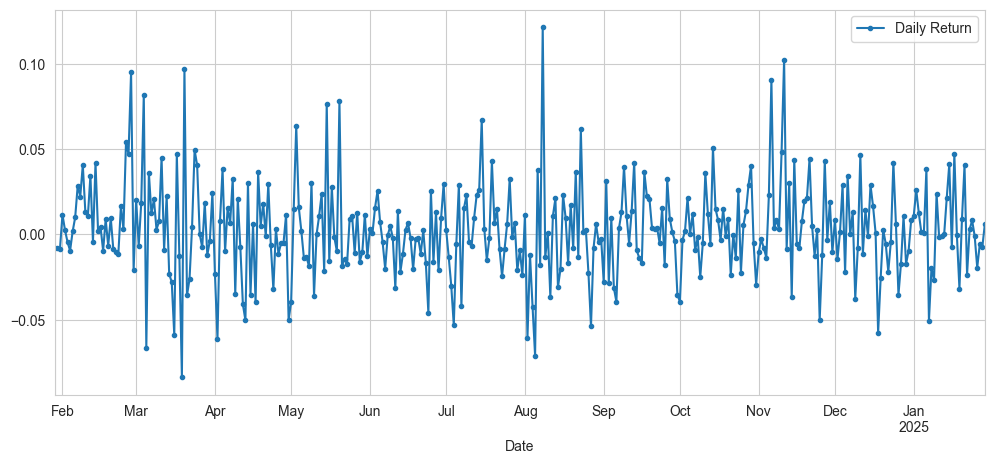

In [16]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

Positive daily returns seem to be more frequent than negative returns.

## What was the correlation between daily returns of different stocks?

In [22]:
#Let's read the 'Close' column from all the cryptocurrencies giants

# close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Close']
crypto_close_df = yf.download(cryptos, start=start, end=end)['Close']

[*********************100%***********************]  3 of 3 completed


In [23]:
crypto_close_df.tail()

Ticker,BTC-USD,ETH-USD,LTC-USD
Date,,,
2025-01-25,104714.648438,3317.269531,123.983070
2025-01-26,102682.500000,3236.134277,117.206612
2025-01-27,102087.687500,3178.920410,114.898705
2025-01-28,101332.476562,3077.112549,110.220032
2025-01-29,102133.984375,3112.110840,112.354599


<Axes: xlabel='Date'>

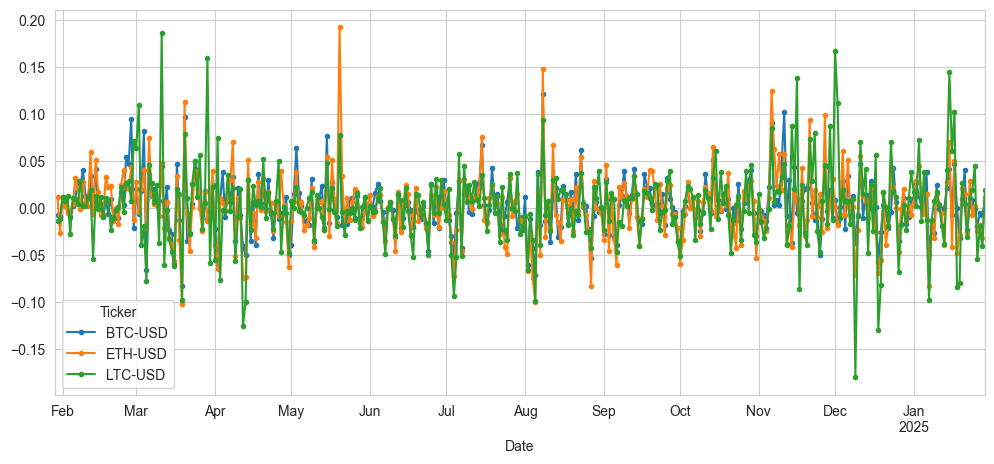

In [24]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = crypto_close_df.pct_change()
returns_df.plot(marker='.',legend=True,figsize=(12,5))

This plot is difficult to understand, let's use a jointplot instead.

In [25]:
returns_df.tail()

Ticker,BTC-USD,ETH-USD,LTC-USD
Date,,,
2025-01-25,-0.001000,0.002331,0.044547
2025-01-26,-0.019407,-0.024458,-0.054656
2025-01-27,-0.005793,-0.017680,-0.019691
2025-01-28,-0.007398,-0.032026,-0.040720
2025-01-29,0.007910,0.011374,0.019366


Correlation Matrix:
 Ticker    BTC-USD   ETH-USD  LTC-USD
Ticker                              
BTC-USD  1.000000  0.537937  0.83672
ETH-USD  0.537937  1.000000  0.69205
LTC-USD  0.836720  0.692050  1.00000


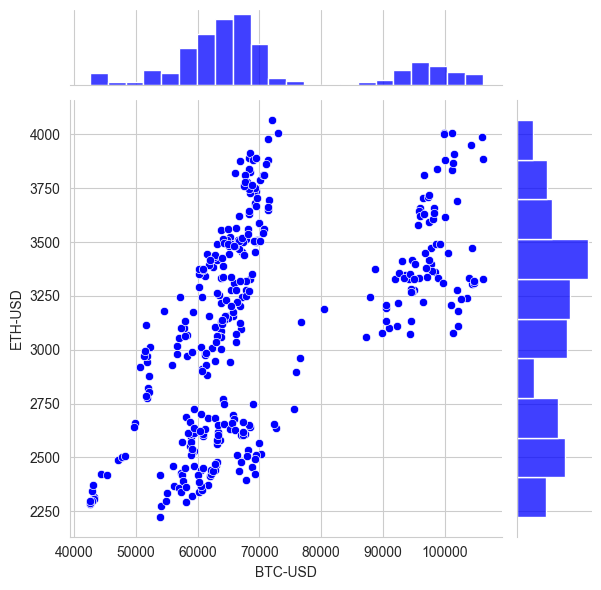

In [ ]:
# Compute correlation
correlation = crypto_close_df.corr()
print("Correlation Matrix:\n", correlation)

#  find the correlation between Bitcoin and Ethreum (Scatter + Histogram)
sns.jointplot(x=crypto_close_df['BTC-USD'], y=crypto_close_df['ETH-USD'], kind="scatter", color="blue")


There seems to be a positive correlation between the two, the pearsonr correlation coefficient value of 0.5 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

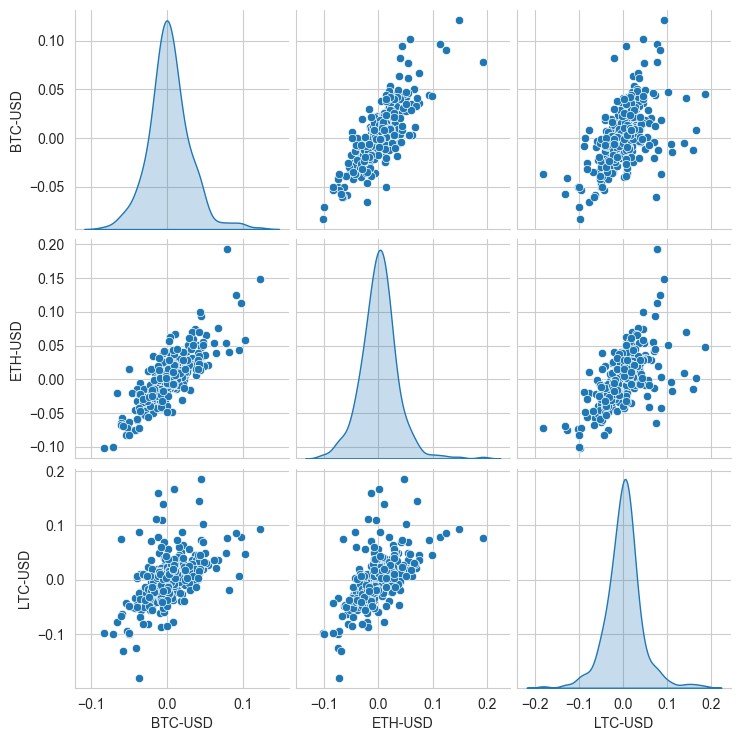

In [29]:
sns.pairplot(returns_df.dropna(),diag_kind='kde')

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

<Axes: xlabel='Ticker', ylabel='Ticker'>

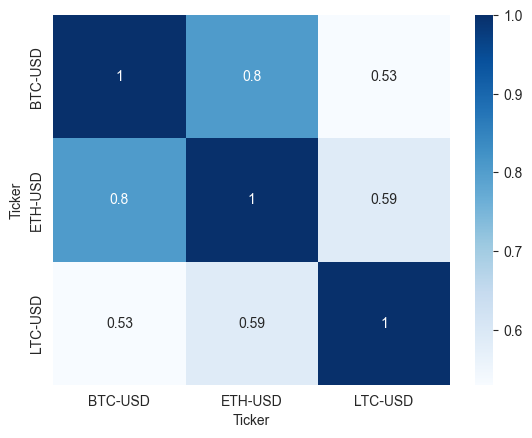

In [30]:
corr = returns_df.dropna().corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')

#the darker the shade the higher the correlation

In [31]:
rets = returns_df.dropna()

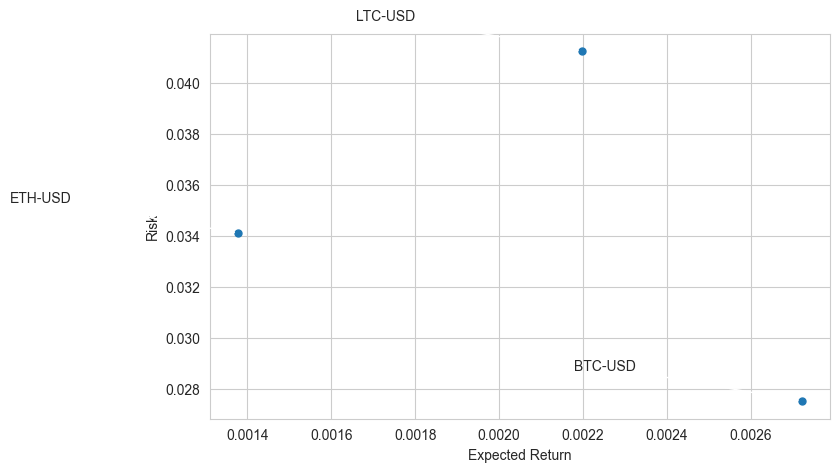

In [32]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(-120,20),
        textcoords = 'offset points', 
        ha = 'right', 
        va = 'bottom',
        arrowprops = dict(arrowstyle='->'))

As of January 12, the current trend for cryptocurrencies seem to output a negative return. We want a crypto with high return and low risk.

In [33]:
rets.head()

Ticker,BTC-USD,ETH-USD,LTC-USD
Date,,,
2024-01-30,-0.007754,0.011838,-0.013746
2024-01-31,-0.008614,-0.026423,-0.011242
2024-02-01,0.011581,0.009323,0.011438
2024-02-02,0.002556,0.001829,0.007212
2024-02-03,-0.004483,-0.005199,0.012254


In [34]:
qt = rets['BTC-USD'].quantile(0.05)

In [35]:
qt_pct = abs(rets['BTC-USD'].quantile(0.05))*100
print(qt_pct)

3.937617463361931


In [37]:
print("The 0.05 empirical quantile of daily returns is at {0:.2f}. This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment).".format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.04. This means that with 95% confidence, the worst daily loss will not exceed -0.04% (of the investment).


## How can we predict future behavior?

In [38]:
days = 365
dt = 1/365
mu = rets.mean()['BTC-USD']
sigma = rets.std()['BTC-USD']

In [40]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price


In [41]:
BTC.tail()

Price,Close,High,Low,Open,Volume,MA 10 days,MA 20 days,MA 50 days,Daily Return
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
Date,,,,,,,,,
2025-01-25,104714.648438,105243.789062,104120.375000,104824.031250,23888996502,103502.692969,99843.341406,98872.468281,-0.001000
2025-01-26,102682.500000,105438.648438,102507.710938,104713.210938,22543395879,103795.252344,99873.562109,98927.651563,-0.019407
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428,103557.817187,100131.811328,98944.685000,-0.005793
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494,103250.257812,100446.258984,99022.680156,-0.007398
2025-01-29,101947.179688,102902.671875,101287.835938,101287.835938,43447181312,103336.014844,100919.416016,99128.115156,0.006066


Text(0.5, 1.0, 'Monte Carlo Analysis for BTC')

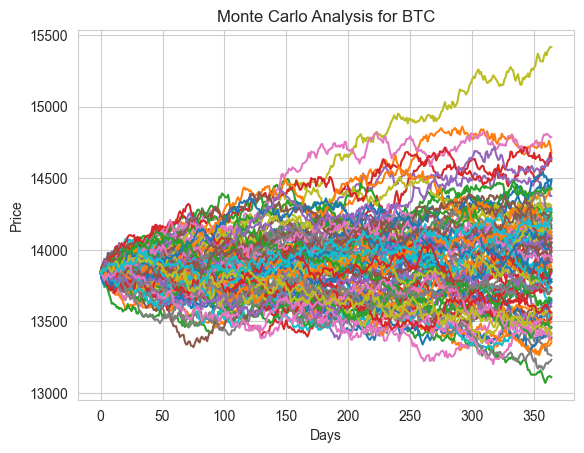

In [42]:
start_price = 13841.190 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for BTC')

In [43]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for BTC after 365 days')

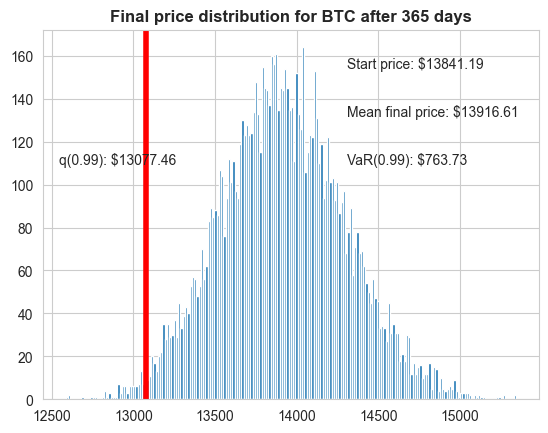

In [45]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for BTC after %s days" %days, weight='bold')

Seems like BTC's overall price is going down. After 14,000 runs the starting price is at $13,840 and it goes down to $13680.